In [1]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze       

# The Aldous-Broder Algorithm
## How does it work?
The Aldous Broder Algorithm is an unbiased algorithm, and entirely random, a trait it manages by having a high time complexity (a worst case of infinity). It works by starting from a cell, going to a random neighbour and drawing a path between them if the neighbour is unvisited.

In [2]:
class GridElement:
    def __init__(self,x,y):
        self.x = x
        self.y = y

In [3]:
def aldousbroder(maze):
    # Creating a visited array to check if the node has been visited or not
    # O represents unvisited and 1 represents visited
    vis = []
    for i in range(0, maze.num_rows):
        # this creates a rows*columns matrix with all elements having value 0
        vis.append(list(bytearray(maze.num_columns)))
    total_cells = maze.num_rows * maze.num_columns
    last_visited_cell = GridElement(0,0)
    vis[last_visited_cell.y][last_visited_cell.x] = 1
    unvisited_cells = total_cells - 1
    possible_directions = ['N','W','S','E']
    # randomly checks neighbours, draws a link till there are non-zero unvisited cells
    while unvisited_cells > 0:
        random_direction = possible_directions[random.randint(0,3)]
        # basic template
        # if there is a random direction
        #     if the cell in that direction is outside bounds
        #         continue
        #     move to a new "last visited cell" in that direction
        #     if this new cell has already been visited
        #         continue
        #     add this path to the maze, but from the cell before moving in this direction
        #     add this "last visited cell" to the visited counter
        #     change number of unvisited cells
        if random_direction == 'N':
            if last_visited_cell.y-1<0:
                continue
            last_visited_cell.y -= 1
            if vis[last_visited_cell.y][last_visited_cell.x] == 1:
                continue
            maze.add_path((last_visited_cell.x,last_visited_cell.y+1),random_direction,0) 
            vis[last_visited_cell.y][last_visited_cell.x] = 1
            unvisited_cells-=1
        elif random_direction == 'W':
            if last_visited_cell.x-1<0:
                continue
            last_visited_cell.x -= 1
            if vis[last_visited_cell.y][last_visited_cell.x] == 1:
                continue
            maze.add_path((last_visited_cell.x+1,last_visited_cell.y),random_direction,0)  
            vis[last_visited_cell.y][last_visited_cell.x] = 1
            unvisited_cells-=1
        elif random_direction == 'S':
            if last_visited_cell.y+1>(maze.num_rows-1):
                continue
            last_visited_cell.y += 1
            if vis[last_visited_cell.y][last_visited_cell.x] == 1:
                continue
            maze.add_path((last_visited_cell.x,last_visited_cell.y-1),random_direction,0)  
            vis[last_visited_cell.y][last_visited_cell.x] = 1
            unvisited_cells-=1
        elif random_direction == 'E':
            if last_visited_cell.x+1>(maze.num_columns-1):
                continue
            last_visited_cell.x += 1
            if vis[last_visited_cell.y][last_visited_cell.x] == 1:
                continue
            maze.add_path((last_visited_cell.x-1,last_visited_cell.y),random_direction,0)
            vis[last_visited_cell.y][last_visited_cell.x] = 1
            unvisited_cells-=1
    #print(vis)
    return 
        

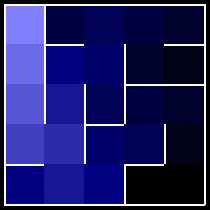

In [4]:
maze = Maze(5,5)
aldousbroder(maze)
maze.add_colors(color=(128, 128, 255))
display(maze.draw(cell_width=40))

## Basic analysis
### Time Complexity : O(Infinity), Amortized analysis left
Mildly complicated, as it's entirely random
### Additional Space : O(N<sup>2</sup>)
For the algorithm to work, we need to check if the nodes are visited. To do this we need to maintain atleast a bit of information per node. As there are N<sup>2</sup> nodes, we need N<sup>2</sup> additional space. We also need a stack that can grow to atmost N<sup>2</sup> size (worst case).
### Bias
Guaranteed to have no bias.

In [8]:
total = {"Deadends": 0, "Straightways": 0, "LeftTurns": 0, "RightTurns": 0, "Junctions": 0, "Crossroads": 0}
for i in range(0, 100):
    maze = Maze(100, 100)
    aldousbroder(maze)
    partial = maze.benchmark()
    total["Deadends"] += partial["Deadends"]
    total["Straightways"] += partial["Straightways"]
    total["LeftTurns"] += partial["LeftTurns"]
    total["RightTurns"] += partial["RightTurns"]
    total["Junctions"] += partial["Junctions"]
    total["Crossroads"] += partial["Crossroads"]

div = 0
for i in total:
    div += total[i]

for i in total:
    total[i] /= div
    total[i] *= 100
    round(total[i], 3)

for i in total:
    print("%12s %s %3f" % (i, " : ", total[i]))

    Deadends  :  29.360300
Straightways  :  17.099200
   LeftTurns  :  13.831900
  RightTurns  :  13.921500
   Junctions  :  22.233900
  Crossroads  :  3.553200


### Further analysis
This algorithm tends to create highly unbiased mazes due to its sheer randomness. However we can see that the percentage of deadends is relatively high, and that of straightways are lower. This indicates the creation of multiple passageways that tend to terminate early and not wind around each other much. There is no bias between the directions. 